In [ ]:
import numpy as np
from matplotlib import pyplot as plt
 
#fmungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#inisialisasi parameter neural network 
#inisialisasi semua weights yang berada pada range 0 dan 1
#semua bias diinisialisasikan 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    weight1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    weight2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    bias1 = np.zeros((neuronsInHiddenLayers, 1))
    bias2 = np.zeros((outputFeatures, 1))
     
    parameters = {"weight1" : weight1, "bias1": bias1,
                  "weight2" : weight2, "bias2": bias2}
    return parameters

In [ ]:
#forward propagation
def forwardPropagation(X, Y, parameters):
    #x.shape untuk
    m = X.shape[1]
    weight1 = parameters["weight1"]
    weight2 = parameters["weight2"]
    bias1 = parameters["bias1"]
    bias2 = parameters["bias2"]
 
    #np.dot untuk
    Z1 = np.dot(weight1, X) + bias1
    A1 = sigmoid(Z1)
    Z2 = np.dot(weight2, A1) + bias2
    A2 = sigmoid(Z2)
 
    cache = (Z1, A1, weight1, bias1, Z2, A2, weight2, bias2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

In [ ]:
#backward propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, weight1, bias1, Z2, A2, weight2, bias2) = cache
     
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
     
    dA1 = np.dot(weight2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
     
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

In [ ]:
#updating weights berasal dari negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["weight1"] = parameters["weight1"] - learningRate * gradients["dW1"]
    parameters["weight2"] = parameters["weight2"] - learningRate * gradients["dW2"]
    parameters["bias1"] = parameters["bias1"] - learningRate * gradients["db1"]
    parameters["bias2"] = parameters["bias2"] - learningRate * gradients["db2"]
    return parameters

In [ ]:
#Input 1: Nilai 1
#Input 2: Nilai 2
X = np.array([[6, 7, 8, 9], [6, 7, 8, 9]]) 

In [ ]:
#Konversi IPK:
#A: 0.9
#B: 0.8
#C: 0.7
#D: 0.6

Y = np.array([[0.6, 0.7, 0.8, 0.9]]) # XOR output

In [ ]:
#definisi model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
 
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

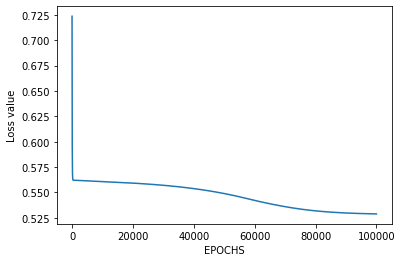

In [ ]:
#evaluasi performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()


In [ ]:
# Testing
X = np.array([[6, 7, 8, 9], [6, 7, 8, 9]]) # XOR input
cost, _, prediction = forwardPropagation(X, Y, parameters)
print(prediction)

[[0.60423893 0.71905608 0.80871681 0.86773266]]
